In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\datasets\\Social_Network_Ads.csv")

In [5]:
%matplotlib inline

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df[df.isnull()].count()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
age_boxplot = np.percentile(df["Age"], [0,25,50,75,100])
age_boxplot

In [16]:
age_boxplot = np.percentile(df["EstimatedSalary"], [0,25,50,75,100])
age_boxplot

array([ 15000.,  43000.,  70000.,  88000., 150000.])

In [22]:
df = df.drop("User ID", axis = 1)

In [24]:
genders = pd.get_dummies(df["Gender"], drop_first = True)

In [26]:
df = pd.concat([genders, df], axis = 1)

In [28]:
df = df.drop ("Gender", axis = 1)

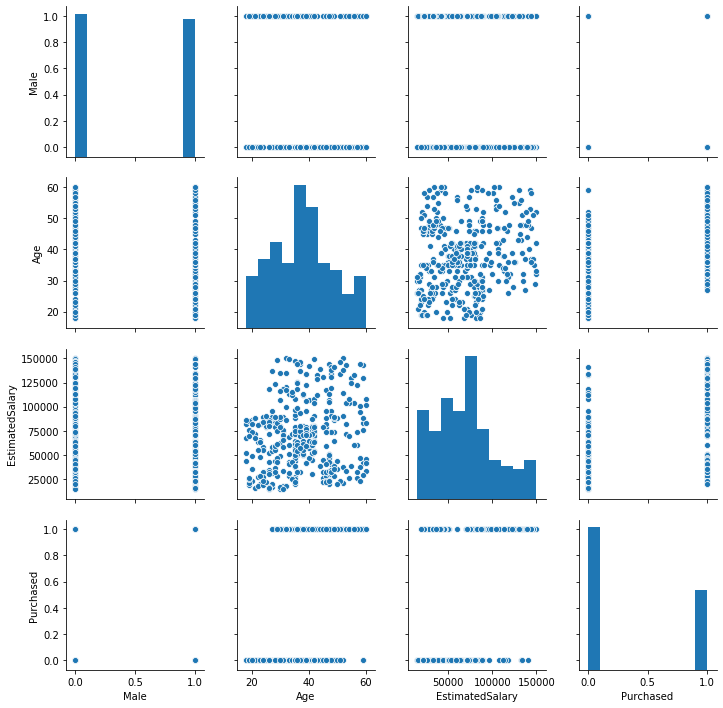

In [29]:
sb.pairplot(df)

In [40]:
y = df["Purchased"]
x = df.drop("Purchased", axis = 1)

In [41]:
sc = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [42]:
cols = x_train.columns
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train, columns = cols)
x_test = pd.DataFrame(x_test, columns = cols)

In [43]:
x_train

,Male,Age,EstimatedSalary
0,1.0,-0.250017,-0.930520
1,-1.0,0.419672,0.254497
2,1.0,-0.250017,-0.366227
3,1.0,-0.250017,0.028779
4,-1.0,1.089361,-0.902306
...,...,...,...
295,-1.0,0.898021,-0.563730
296,1.0,0.419672,-0.479085
297,-1.0,0.993691,-1.156238
298,-1.0,2.046059,0.480214


In [44]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)

In [45]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred = knn.predict(x_test)

In [47]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.86      0.91      0.88        33

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100

